In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = load_iris()

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
(df.data)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
df.target.size

150

In [16]:
df.data.shape

(150, 4)

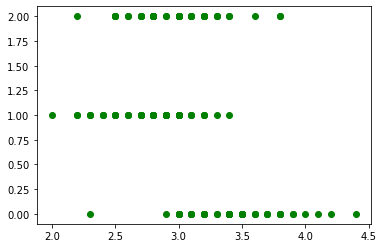

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(df.data[:,1],df.target,color='g')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.data,df.target,test_size=0.3, random_state=0)

In [19]:
# steps:
# 1. preprocessing by standard scaler
# 2. reduce dimension by pca
# 3. apply classifier

pipeline_lr=Pipeline([
    ('scalar1', StandardScaler()),
    ('pca1', PCA(n_components=2)),
    ('lr_classifier', LogisticRegression(random_state=0))
])

pipeline_dt=Pipeline([
    ('scalar2', StandardScaler()),
    ('pca2', PCA(n_components=2)),
    ('dt_classifier', DecisionTreeClassifier())
])

pipeline_rf=Pipeline([
    ('scalar3', StandardScaler()),
    ('pca3', PCA(n_components=2)),
    ('rf_classifier', RandomForestClassifier())
])

In [20]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

In [22]:
# use accuracy as criterion
best_accuracy = 0
best_classifier = 0
best_pipeline = ''


# create a dict corresponding to index
pipe_dict = {0: 'Logistic Regression', 1:'Decision Tree',2:'Random Forest'}

In [23]:
# fit the pipelines

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [25]:
for i, pipe in enumerate(pipelines):
    print(f"{pipe_dict[i]} Test accuracy : {pipe.score(X_test,y_test)}")

Logistic Regression Test accuracy : 0.8666666666666667
Decision Tree Test accuracy : 0.9111111111111111
Random Forest Test accuracy : 0.9111111111111111


In [31]:
for i, model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_classifier=i
        best_pipeline=model
        
print(f"Best classifier: {pipe_dict[best_classifier]}")

Best classifier: Decision Tree


In [32]:
best_pipeline

Pipeline(steps=[('scalar2', StandardScaler()), ('pca2', PCA(n_components=2)),
                ('dt_classifier', DecisionTreeClassifier())])

In [33]:
print(best_pipeline)

Pipeline(steps=[('scalar2', StandardScaler()), ('pca2', PCA(n_components=2)),
                ('dt_classifier', DecisionTreeClassifier())])


## check accuracy and other stuff

In [39]:
# y_hat for linear regression
y_lr=pipeline_lr.predict(X_test)
y_lr

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [40]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [47]:
# print out y_hat and y_test
display(y_lr, y_test)


array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [50]:
df_new = pd.concat([pd.DataFrame(y_lr,columns=['y_lr']),pd.DataFrame(y_test,columns=['y test']) ],axis=1)
df_new

,y_lr,y test
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,2,1
8,2,1
9,1,1


In [41]:
confusion_matrix(y_test,y_lr)

array([[16,  0,  0],
       [ 0, 14,  4],
       [ 0,  2,  9]], dtype=int64)

In [43]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.78      0.82        18
           2       0.69      0.82      0.75        11

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45



In [51]:
display(14/16,9/13)

0.875

0.6923076923076923

In [52]:
display(14/18,9/11)

0.7777777777777778

0.8181818181818182

In [54]:
39/45

0.8666666666666667